In [ ]:
install.packages('TSA')
install.packages('forecast')
install.packages('tseries')
install.packages('normtest')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘zoo’, ‘quantmod’, ‘leaps’, ‘locfit’, ‘tseries’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘urca’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(TSA)
library(forecast)
library(tseries)
library(normtest)


Attaching package: ‘TSA’


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Registered S3 methods overwritten by 'forecast':
  method       from
  fitted.Arima TSA 
  plot.Arima   TSA 



In [ ]:
kings <- scan("http://robjhyndman.com/tsdldata/misc/kings.dat",skip=3)
kingstimeseries <- ts(kings, frequency=1, start=c(1))
head(kingstimeseries)
tail(kingstimeseries)

A Time Series:
[1] 60 43 67 50 56 42

A Time Series:
[1] 71 81 68 70 77 56


	Augmented Dickey-Fuller Test

data:  kingstimeseries
Dickey-Fuller = -2.1132, Lag order = 3, p-value = 0.529
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  diffkings
Dickey-Fuller = -4.0754, Lag order = 3, p-value = 0.01654
alternative hypothesis: stationary


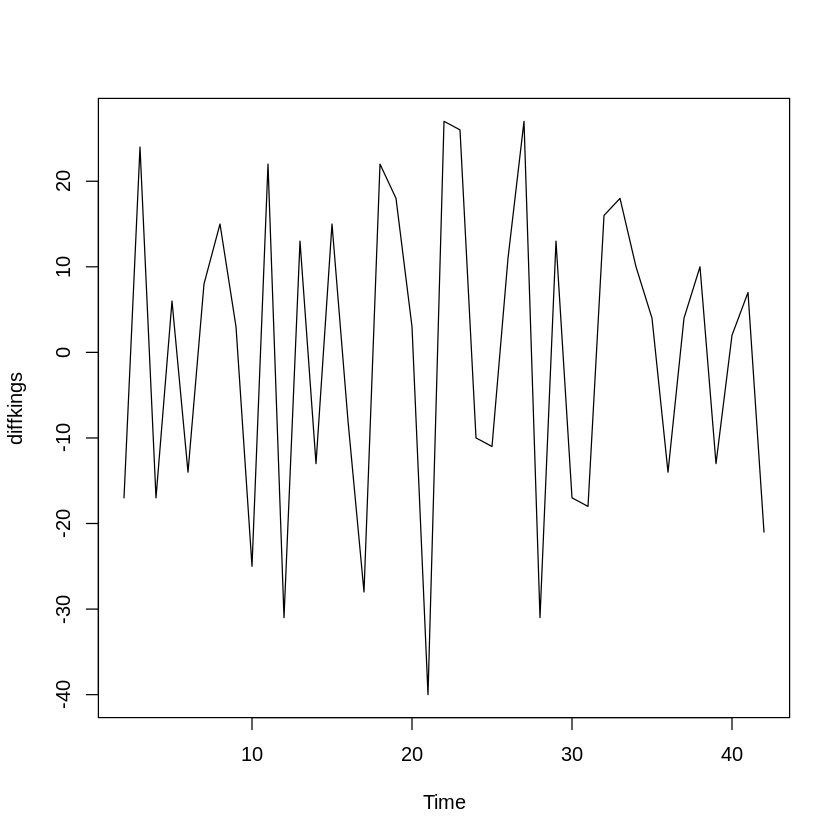

In [ ]:
adf.test(kingstimeseries) #data tidak stasioner
diffkings <- diff(kingstimeseries, differences=1)
plot(diffkings)
adf.test(diffkings)

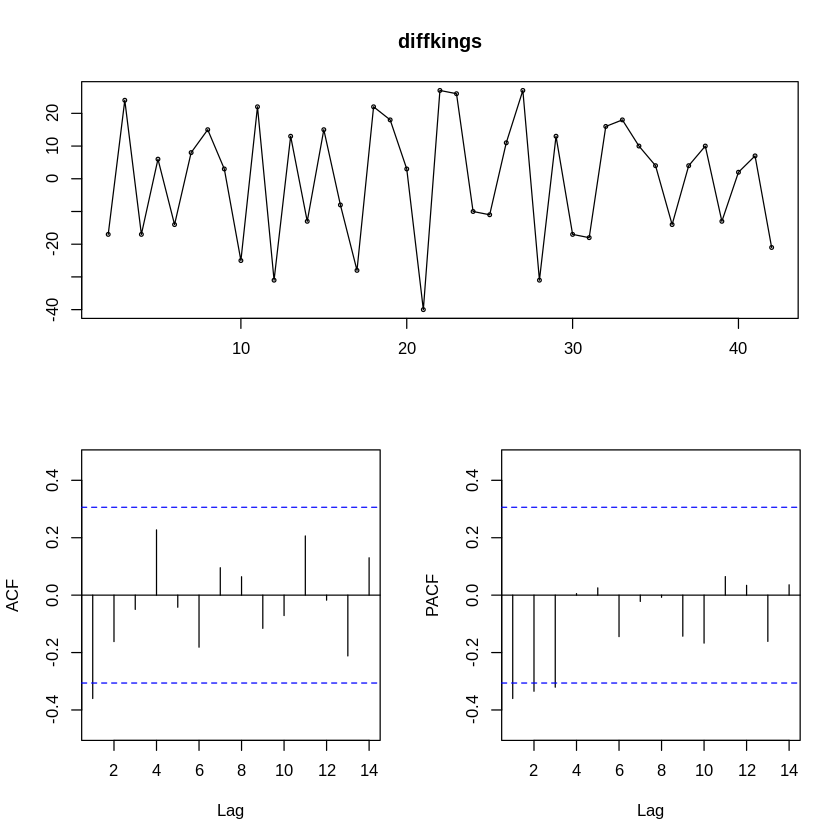

In [ ]:
tsdisplay(diffkings)

In [ ]:
model1 <- Arima(kingstimeseries, order=c(1,1,0))
model2 <- Arima(kingstimeseries, order=c(0,1,1))
model3 <- Arima(kingstimeseries, order=c(1,1,1))
cbind(model1, model2, model3)

model1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
coef      -0.3712836                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
sigma2    290.6207                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
var.coef  0.02153902                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
mask      TRUE                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
loglik    -174.0208                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
aic       352.0417                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
arma      1, 0, 0, 0, 1, 1, 0                                                                                  

In [ ]:
model1

Series: kingstimeseries 
ARIMA(1,1,0) 

Coefficients:
          ar1
      -0.3713
s.e.   0.1468

sigma^2 = 290.6:  log likelihood = -174.02
AIC=352.04   AICc=352.36   BIC=355.47

In [ ]:
model2

Series: kingstimeseries 
ARIMA(0,1,1) 

Coefficients:
          ma1
      -0.7218
s.e.   0.1208

sigma^2 = 236.2:  log likelihood = -170.06
AIC=344.13   AICc=344.44   BIC=347.56

In [ ]:
cbind(model1,model2)

model1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
coef      -0.3712836                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
sigma2    290.6207                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
var.coef  0.02153902                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
mask      TRUE                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
loglik    -174.0208                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
aic       352.0417                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
arma      1, 0, 0, 0, 1, 1, 0                                                                                  

In [ ]:
fit <- Arima(kingstimeseries, order=c(1,1,1))
fit

In [ ]:
checkresiduals(fit)
jb.norm.test(kingstimeseries, nrepl=2000)

In [ ]:
overfit1 <- Arima(kingstimeseries, order=c(2,1,1))
overfit2 <- Arima(kingstimeseries, order=c(1,1,2))
overfit1
overfit2

In [ ]:
actual=window(kingstimeseries, start=c(38))
kingstimeseries2=window(kingstimeseries, end=c(37))
fit2 <- Arima(kingstimeseries2, order=c(1,1,1))
forecast2 <- forecast(fit2, h=5)
plot(forecast2)
cbind(actual, forecast2)

In [ ]:
forecast <- forecast(fit, h=5)
plot(forecast)
forecast